In [22]:
# pip install pydub
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd

### Download the music
code from: https://surenjanath.medium.com/automating-spotify-playlist-music-download-spotify-free-version-3ca289bf59f7

muisc list from spotify: 'https://open.spotify.com/playlist/65LdqYCLcsV0lJoxpeQ6fW?si=62f253610dc24d24'
#https://open.spotify.com/playlist/1H3AmBXPtLgPOwwf1WvUYb?si=4304e59f957c4e03
#https://open.spotify.com/playlist/4yeF8WVBDCQV2VEQWZxaZJ?si=3879295b12e44fb0
#https://open.spotify.com/playlist/37i9dQZF1DX1sUunABTZ4W?si=f30f1ffc86734d91
#https://open.spotify.com/playlist/37i9dQZF1DX7zXqDWRZPD1?si=3d983e36153f4f71
#https://open.spotify.com/playlist/37i9dQZF1DWVUmQhB7PvFH?si=f9a903b8a109403a
#https://open.spotify.com/playlist/37i9dQZF1DWVUmQhB7PvFH?si=5c1d1dbf1e0a44f6
#https://open.spotify.com/playlist/4vVpdhV4u8rYAjyGDk776k?si=4734440ab3ac481d
#https://open.spotify.com/playlist/37i9dQZF1DXe3opFF4aPDr?si=609987fbc6b54701

In [67]:
import subprocess
import os
import string
import random

try:
    import requests
    import re
    import tqdm
    from mutagen.easyid3 import EasyID3
    from mutagen.id3 import APIC, ID3
    import ipywidgets as widgets

except ImportError:
    !pip install requests --silent
    !pip install re --silent
    !pip install mutagen --silent
    !pip install ipywidgets --silent
    !pip install tqdm --silent
    # //after installation
    import requests
    import re
    import tqdm
    from mutagen.easyid3 import EasyID3
    from mutagen.id3 import APIC, ID3
    import ipywidgets as widgets

def returnSPOT_ID(link):
        # # The 'returnSPOT_ID' function from your scraper code

        # Define the regular expression pattern for the Spotify playlist URL
        pattern = r"https://open\.spotify\.com/playlist/([a-zA-Z0-9]+)\?si=.*"

        # Try to match the pattern in the input text
        match = re.match(pattern, link)

        if not match:
            return False
        return True


# variables
CWD = os.getcwd()
LOCATION = os.path.join(CWD,'MUSIC')
if os.path.isdir(LOCATION)==False:
    os.mkdir(LOCATION)

from IPython.display import display, HTML, Javascript, Audio

import IPython

# Custom CSS styles
custom_css = HTML("""
<style>
    .input-container {
        display: flex;
        flex-direction: row;
        align-items: center;
        margin-bottom: 10px;
    }
    .input-field {
        flex: 1;
        padding: 5px;
        font-size: 14px;
        border: 2px solid #007BFF;
        border-radius: 5px;
    }
    .submit-button {
        background-color: #007BFF;
        color: white;
        padding: 5px 10px;
        border: none;
        border-radius: 5px;
        cursor: pointer;
    }
    .submit-button:hover {
        background-color: #0056b3;
    }
</style>
""")

# Function to handle button click event
def handle_link_button_click(b):
    global SPOTIFY_PLAYLIST_LINK
    # Get the link from the input field
    if returnSPOT_ID(link_input.value) :
        SPOTIFY_PLAYLIST_LINK = link_input.value
         # Display the entered link as a clickable HTML link
        display(HTML(f"Playlist Link Entered : <a href='{SPOTIFY_PLAYLIST_LINK}' target='_blank'>{SPOTIFY_PLAYLIST_LINK}</a>"))

        # Store the entered link as a global variable
        IPython.get_ipython().run_line_magic('store', 'SPOTIFY_PLAYLIST_LINK')
    else:
        print('[*] Something Not Right about that link...  Try Again Please..')



# Create a text input widget for entering the link
link_input = widgets.Text(placeholder="Enter a link")

# Create a button widget
link_button = widgets.Button(description="Submit Link")

# Attach the button click event handler
link_button.on_click(handle_link_button_click)

print('[*] Please Enter Spotify Playlist Link :')
# Display the custom CSS styles, input field, and button
# display(custom_css)
display(widgets.VBox([link_input, link_button]))


[*] Please Enter Spotify Playlist Link :


Stored 'SPOTIFY_PLAYLIST_LINK' (str)


In [68]:
class MusicScraper():

    def __init__(self):
        super(MusicScraper, self).__init__()
        self.counter = 0  # Initialize the counter to zero
        self.session = requests.Session()

    def get_ID(self, yt_id):
        # The 'get_ID' function from your scraper code
        LINK = f'https://api.spotifydown.com/getId/{yt_id}'
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/getId/{id}',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        response = self.session.get(url=LINK, headers=headers)
        if response.status_code == 200:
            data = response.json()
            return data['id']
        return None

    def generate_Analyze_id(self, yt_id):
        # The 'generate_Analyze_id' function from your scraper code
        DL = 'https://corsproxy.io/?https://www.y2mate.com/mates/analyzeV2/ajax'
        data = {
            'k_query': f'https://www.youtube.com/watch?v={yt_id}',
            'k_page': 'home',
            'hl': 'en',
            'q_auto': 0,
        }
        headers = {
            'authority': 'corsproxy.io',
            'method': 'POST',
            'path': '/?https://www.y2mate.com/mates/analyzeV2/ajax',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        RES = self.session.post(url=DL, data=data, headers=headers)
        if RES.status_code == 200:
            return RES.json()
        return None

    def generate_Conversion_id(self, analyze_yt_id, analyze_id):
        # The 'generate_Conversion_id' function from your scraper code
        DL = 'https://corsproxy.io/?https://www.y2mate.com/mates/convertV2/index'
        data = {
            'vid'   : analyze_yt_id,
            'k'     : analyze_id,
        }
        headers = {
            'authority': 'corsproxy.io',
            'method': 'POST',
            'path': '/?https://www.y2mate.com/mates/analyzeV2/ajax',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        RES = self.session.post(url=DL, data=data, headers=headers)
        if RES.status_code == 200:
            return RES.json()
        return None

    def get_PlaylistMetadata(self, Playlist_ID):
        # The 'get_PlaylistMetadata' function from your scraper code
        URL = f'https://api.spotifydown.com/metadata/playlist/{Playlist_ID}'
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/metadata/playlist/{Playlist_ID}',
            'scheme': 'https',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
        }
        meta_data = self.session.get(headers=headers, url=URL)
        if meta_data.status_code == 200:
            return meta_data.json()['title'] + ' - ' + meta_data.json()['artists']
        return None

    def errorcatch(self, SONG_ID):
        # The 'errorcatch' function from your scraper code
        print('[*] Trying to download...')
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/download/{SONG_ID}',
            'scheme': 'https',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
        }
        x = self.session.get(headers=headers, url='https://api.spotifydown.com/download/' + SONG_ID)
        if x.status_code == 200:
            return x.json()['link']
        return None

    def V2catch(self, SONG_ID):
        ## Updated .. .19TH OCTOBER 2023
        # yt_id = self.get_ID(SONG_ID)

        # domain = ["co.wuk.sh", "cobalt2.snapredd.app"]
        # target_domain = domain[random.randint(0,len(domain) - 1)]
        headers = {
            "authority": "api.spotifydown.com",
            "method": "POST",
            "path": '/download/68GdZAAowWDac3SkdNWOwo',
            "scheme": "https",
            "Accept": "*/*",

            'Sec-Ch-Ua':'"Chromium";v="118", "Google Chrome";v="118", "Not=A?Brand";v="99"',
            "Dnt": '1',
            "Origin": "https://spotifydown.com",
            "Referer": "https://spotifydown.com/",
            "Sec-Ch-Ua-Mobile": "?0",
            "Sec-Fetch-Dest": "empty",
            "Sec-Fetch-Mode": "cors",
            "Sec-Fetch-Site": "cross-site",
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
        }

        ## Updated .. .29TH OCTOBER 2023
        x = self.session.get(url = f'https://api.spotifydown.com/download/{SONG_ID}', headers=headers)

        # if x.status_code == 200:

        #     # par = {
        #     #     'aFormat':'"mp3"',
        #     #     'dubLang':'false',
        #     #     'filenamePattern':'"classic"',
        #     #     'isAudioOnly':'true',
        #     #     'isNoTTWatermark':'true',
        #     #     'url':f'"https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D{yt_id}"'
        #     # }

        #     file_status = self.session.post(url=f"https://{target_domain}/api/json", json=par, headers=headers)
        # print('[*] Data Gathered : ', str(x.content))
        if x.status_code == 200:

            try:
                return {
                    'link' : x.json()['link'],
                    'metadata' : None
                }
            except:
                return {
                    'link' : None,
                    'metadata' : None
                }

        return None


    def scrape_playlist(self, spotify_playlist_link, music_folder):
        ID = self.returnSPOT_ID(spotify_playlist_link)
        PlaylistName = self.get_PlaylistMetadata(ID)
        print('Playlist Name : ', PlaylistName)
        # Create Folder for Playlist
        if not os.path.exists(music_folder):
            os.makedirs(music_folder)
        try:
            FolderPath = ''.join(e for e in PlaylistName if e.isalnum() or e in [' ', '_'])
            playlist_folder_path = os.path.join(music_folder, FolderPath)
        except:
            playlist_folder_path = music_folder

        if not os.path.exists(playlist_folder_path):
            os.makedirs(playlist_folder_path)

        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/trackList/playlist/{ID}',
            'scheme': 'https',
            'accept': '*/*',
            'dnt': '1',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
            'sec-ch-ua-mobile': '?0',
            'sec-ch-ua-platform': '"Windows"',
            'sec-fetch-dest': 'empty',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
        }

        Playlist_Link = f'https://api.spotifydown.com/trackList/playlist/{ID}'
        offset_data = {}
        offset = 0
        offset_data['offset'] = offset

        while offset is not None:
            response = self.session.get(url=Playlist_Link, params=offset_data, headers=headers)
            if response.status_code == 200:
                Tdata = response.json()['trackList']
                page = response.json()['nextOffset']
                print("*"*100)
                for count, song in enumerate(Tdata):
                    print("[*] Downloading : ", song['title'], "-", song['artists'])
                    filename = song['title'].translate(str.maketrans('', '', string.punctuation)) + ' - ' + song['artists'].translate(str.maketrans('', '', string.punctuation)) + '.mp3'
                    filepath = os.path.join(playlist_folder_path, filename)
                    try:
                        try:
                            V2METHOD    = self.V2catch(song['id'])
                            DL_LINK     = V2METHOD['link']
                            SONG_META   = song
                            SONG_META['file'] = filepath

                        except IndentationError:
                            yt_id = self.get_ID(song['id'])

                            if yt_id is not None:
                                data = self.generate_Analyze_id(yt_id['id'])
                                try:
                                    DL_ID = data['links']['mp3']['mp3128']['k']
                                    DL_DATA = self.generate_Conversion_id(data['vid'], DL_ID)
                                    DL_LINK = DL_DATA['dlink']
                                except Exception as NoLinkError:
                                    CatchMe = self.errorcatch(song['id'])
                                    if CatchMe is not None:
                                        DL_LINK = CatchMe
                            else:
                                print('[*] No data found for : ', song)

                        download_complete = False
                        if DL_LINK is not None:
                            ## DOWNLOAD
                            link = self.session.get(DL_LINK, stream=True)
                            total_size = int(link.headers.get('content-length', 0))
                            block_size = 1024  # 1 Kilobyte
                            downloaded = 0
                            ## Save
                            with open(filepath, "wb") as f:
                                for data in link.iter_content(block_size):
                                    f.write(data)
                                    downloaded += len(data)
                            download_complete = True
                            #Increment the counter
                            self.increment_counter()

                        else:
                            print('[*] No Download Link Found. Skipping...')
                        if (DL_LINK is not None)&(download_complete == True):
                            songTag = WritingMetaTags(tags=SONG_META, filename=filepath)
                            song_meta_add = songTag.WritingMetaTags()
                    except IndentationError as error_status:
                        print('[*] Error Status Code : ', error_status)

            if page is not None:
                offset_data['offset'] = page
                response = self.session.get(url=Playlist_Link, params=offset_data, headers=headers)
            else:
                print("*"*100)
                print('[*] Download Complete!')
                print("*"*100)
                break


    def returnSPOT_ID(self, link):
        # # The 'returnSPOT_ID' function from your scraper code

        # Define the regular expression pattern for the Spotify playlist URL
        pattern = r"https://open\.spotify\.com/playlist/([a-zA-Z0-9]+)\?si=.*"

        # Try to match the pattern in the input text
        match = re.match(pattern, link)

        if not match:
            raise ValueError("Invalid Spotify playlist URL.")
        # Extract the playlist ID from the matched pattern
        extracted_id = match.group(1)

        return extracted_id

    def increment_counter(self):
            self.counter += 1

# Scraper Thread
class WritingMetaTags():
    def __init__(self, tags, filename):
        super().__init__()
        self.tags = tags
        self.filename = filename
        self.PICTUREDATA = None
        self.url = None

    def setPIC(self):
        if self.tags['cover'] is None:
            pass
        else:
            try:
                response = requests.get(self.tags['cover']+"?size=1", stream=True)
                if response.status_code == 200 :
                    audio = ID3(self.filename)
                    audio['APIC'] = APIC(
                        encoding=3,
                        mime='image/jpeg',
                        type=3,
                        desc=u'Cover',
                        data=response.content
                    )
                    audio.save()

            except Exception as e:
                print(f"Error adding cover: {e}")

    def WritingMetaTags(self):
        try:
            # print('[*] FileName : ', self.filename)
            audio = EasyID3(self.filename)
            audio['title'] = self.tags['title']
            audio['artist'] = self.tags['artists']
            audio['album'] = self.tags['album']
            audio['date'] = self.tags['releaseDate']
            audio.save()
            self.setPIC()

        except Exception as e:
            print(f'Error {e}')

In [69]:
if SPOTIFY_PLAYLIST_LINK is not None:
    OFFSET_VARIABLE = 0 #<-- Change to start from x number of songs
    music_folder = os.path.join(os.getcwd(), "music")  # Change this path to your desired music folder

    scraper = MusicScraper()
    ID = scraper.returnSPOT_ID(SPOTIFY_PLAYLIST_LINK)
    scraper.scrape_playlist(SPOTIFY_PLAYLIST_LINK, music_folder)
else:
    print("[*] ERROR OCCURRED. MISSING PLAYLIST LINK !")

Playlist Name :  2000-2009年最强华语金典TOP100 - BruceLLT
****************************************************************************************************
[*] Downloading :  隱形的翅膀 - Angela Chang
[*] Downloading :  青花瓷 - Jay Chou
[*] Downloading :  後來 - Rene Liu
[*] Downloading :  至少還有你 - Sandy Lam
[*] Downloading :  十年 - Eason Chan
[*] Downloading :  勇氣 - Fish Leong
[*] Downloading :  黃昏 (亞洲慶功版) - Steve Chou
[*] Downloading :  童話 - Michael Wong
[*] Downloading :  最炫民族风 - 凤凰传奇
[*] Downloading :  Super Star - S.H.E
[*] Downloading :  流星雨 - F4
[*] Downloading :  雙截棍 - Jay Chou
[*] Downloading :  七里香 - Jay Chou
[*] Downloading :  遇見 - Stefanie Sun
[*] Downloading :  稻香 - Jay Chou
[*] Downloading :  中國話 - S.H.E
[*] Downloading :  江南 - JJ Lin
[*] Downloading :  千里之外 - Jay Chou, Fei Yu-ching
[*] Downloading :  夜曲 - Jay Chou
[*] Downloading :  美丽的神话 - 金喜善
[*] Downloading :  愛情轉移(國) - Eason Chan
[*] Downloading :  月亮之上 - 凤凰传奇
[*] Downloading :  2002年的第一場雪 - 刀郎
[*] Downloading :  歐若拉 - Angela Chang

### convert the format from mp3 to wav

In [73]:
from pydub import AudioSegment
import os

# Define input directory and output directory
input_dir = "/Users/autumn/Documents/GitHub/MiniProj/MUSIC/2010年代華語最流行  Spotify"
output_dir = "/Users/autumn/Documents/GitHub/MiniProj/MUSIC/10"

# Get all music files in the input directory
input_files = os.listdir(input_dir)
# print(input_files)

# Iterate through each music file and convert the format
for file in input_files:
    if file.endswith(".mp3"):
        input_path = os.path.join(input_dir, file)
        output_path = os.path.join(output_dir, os.path.splitext(file)[0] + ".wav")
        
        # Load the music file
        sound = AudioSegment.from_mp3(input_path)
        
        # Convert the format and save
        sound.export(output_path, format="wav")


### extract segment of the song

In [77]:
import os
import soundfile as sf
import random

# Input directory path
input_directory = '/Users/autumn/Documents/GitHub/MiniProj/MUSIC/10'
# Output directory path
output_directory = '/Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1'
# Number of segments to extract per song
segments_per_song = 10
# Duration of each segment (seconds)
segment_duration = 5
# Start extraction time (seconds)
start_extract_time = 20
# End extraction time (seconds)
end_extract_time = -20  # Negative value indicates seconds from the end

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Initialize counter
count = 0

# Iterate through each file in the input directory
for filename in os.listdir(input_directory):
    
    if filename.endswith('.wav'):  # Process only WAV files
        # Read the original audio file
        audio_data, sample_rate = sf.read(os.path.join(input_directory, filename))
        # Calculate the audio length
        audio_length = len(audio_data) / sample_rate
        
        # Skip if the audio length is less than the required duration plus start and end extract times
        if audio_length < (segment_duration * segments_per_song) + start_extract_time + abs(end_extract_time):
            print(f"Ignoring {filename} as its duration is less than {segment_duration * segments_per_song} seconds plus start and end extract times.")
            continue

        # Extract segments one by one
        for i in range(segments_per_song):
            # Calculate the start point for extraction
            start_sample = int(random.uniform(start_extract_time, audio_length + end_extract_time - segment_duration) * sample_rate)
            end_sample = start_sample + int(segment_duration * sample_rate)
            
            # Construct the new filename
            new_filename = f'10.{count:05d}.wav'
            # Construct the output file path
            output_path = os.path.join(output_directory, new_filename)
            
            # Extract the audio segment and save it
            sf.write(output_path, audio_data[start_sample:end_sample], sample_rate)

            print(f"Extracted {segment_duration


Extracted 5-second segment 1 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1/10.00000.wav.
Extracted 5-second segment 2 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1/10.00001.wav.
Extracted 5-second segment 3 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1/10.00002.wav.
Extracted 5-second segment 4 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1/10.00003.wav.
Extracted 5-second segment 5 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1/10.00004.wav.
Extracted 5-second segment 6 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1/10.00005.wav.
Extracted 5-second segment 7 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/10.1/10.00006.wav.
Extracted 5-second segment 8 from 那些年 - Hu Xia.wav and saved to /Users/autumn/Documents/GitHub/Mi

### set verify folder

In [96]:
import os
import shutil

# Source folder path
source_folder = '/Users/autumn/Documents/GitHub/MiniProj/MUSIC/verify/10'
# Destination folder path
destination_folder = '/Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10'

# Ensure the destination folder exists, create it if it doesn't
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Iterate through all files in the source folder
for filename in os.listdir(source_folder):
    # Ensure the file is in .wav format
    if filename.endswith('.wav'):
        # Extract the last digit from the filename
        last_digit = int(filename.split('.')[1][-1])
        # If the last digit is even, move the file to the destination folder
        if last_digit % 2 == 0:
            source_file_path = os.path.join(source_folder, filename)
            destination_file_path = os.path.join(destination_folder, filename)
            shutil.move(source_file_path, destination_file_path)
            print(f"Moved {filename} to {destination_folder}")

print("Task completed.")


Moved 10.00582.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00596.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00780.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00958.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00794.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00964.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00970.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00192.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00838.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00186.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00810.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00804.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00390.wav to /Users/autumn/Documents/GitHub/MiniProj/MUSIC/cut/10
Moved 10.00384.wav to /Us

### Analyse the sample

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


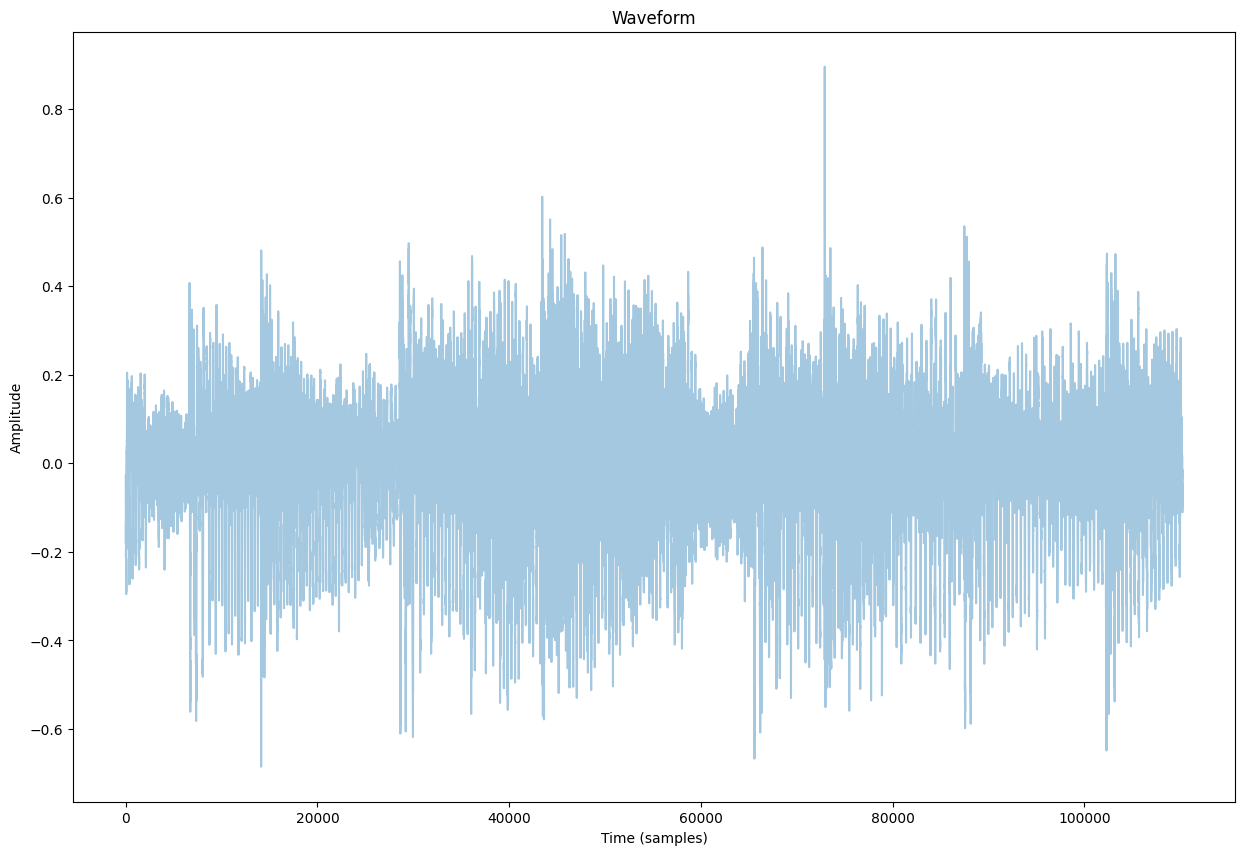

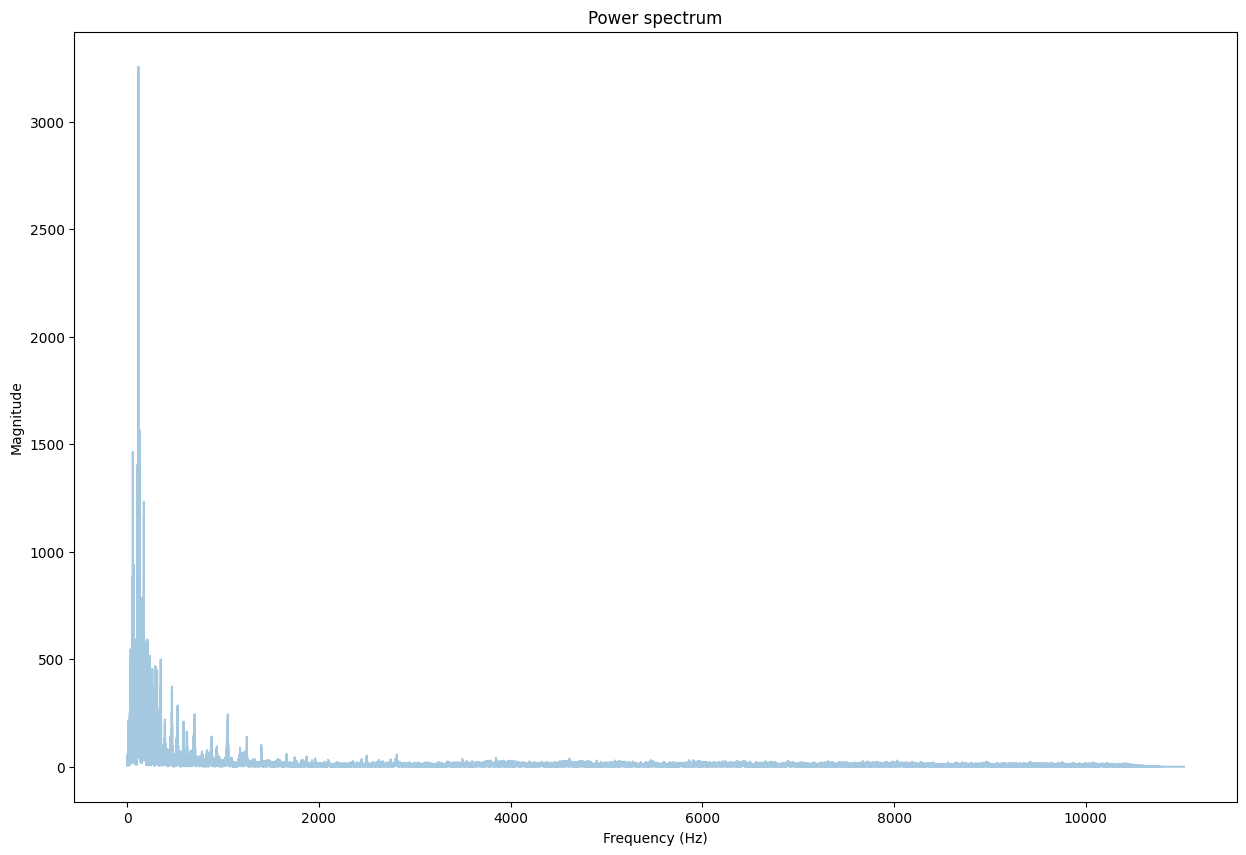

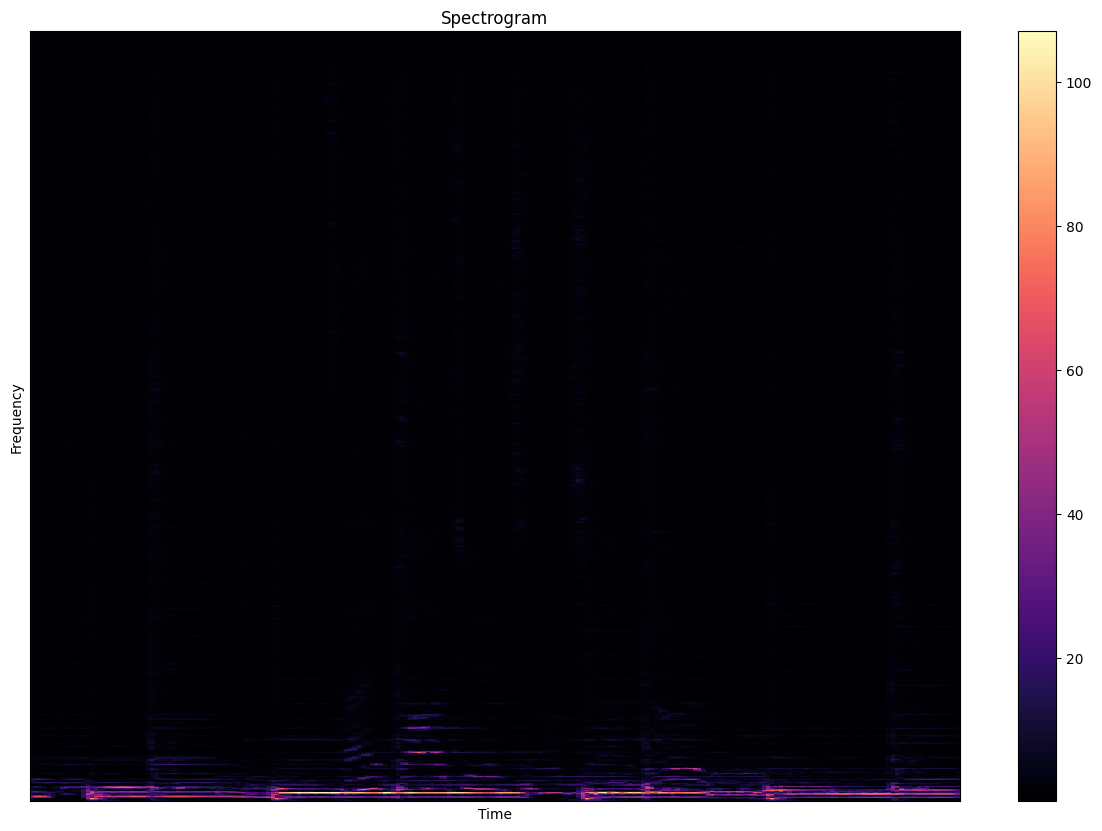

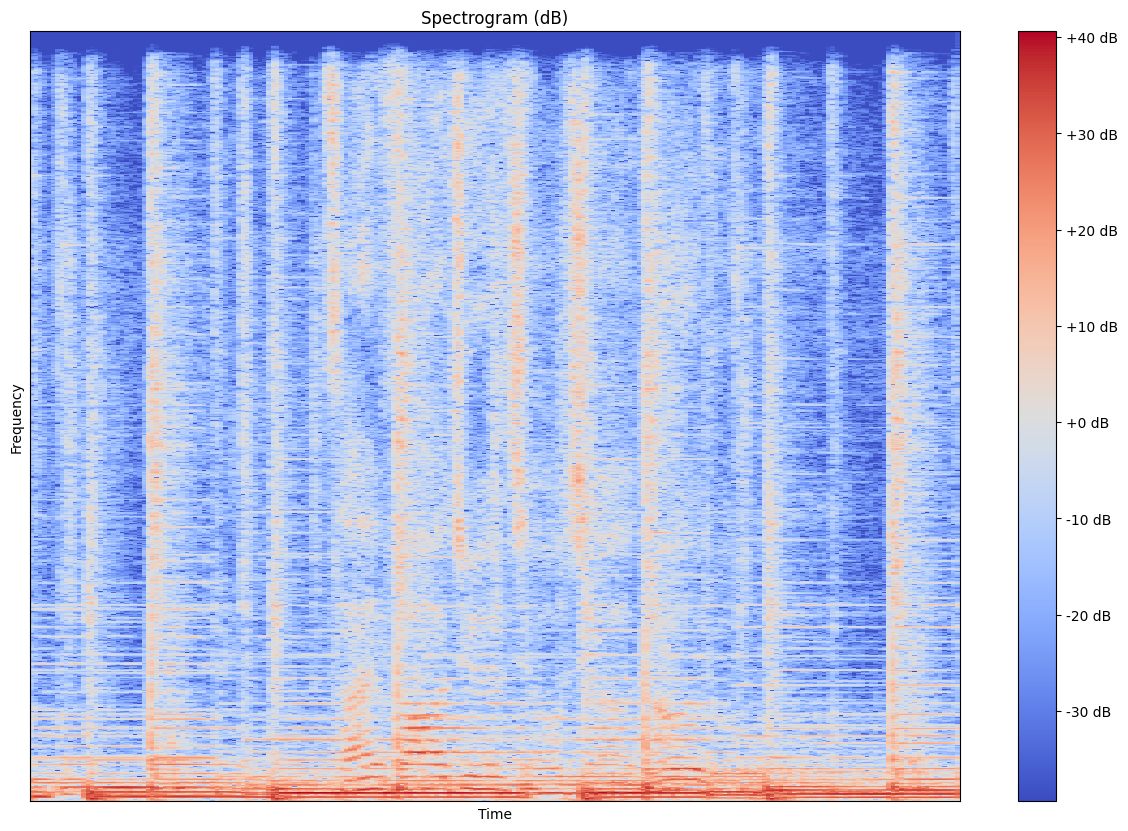

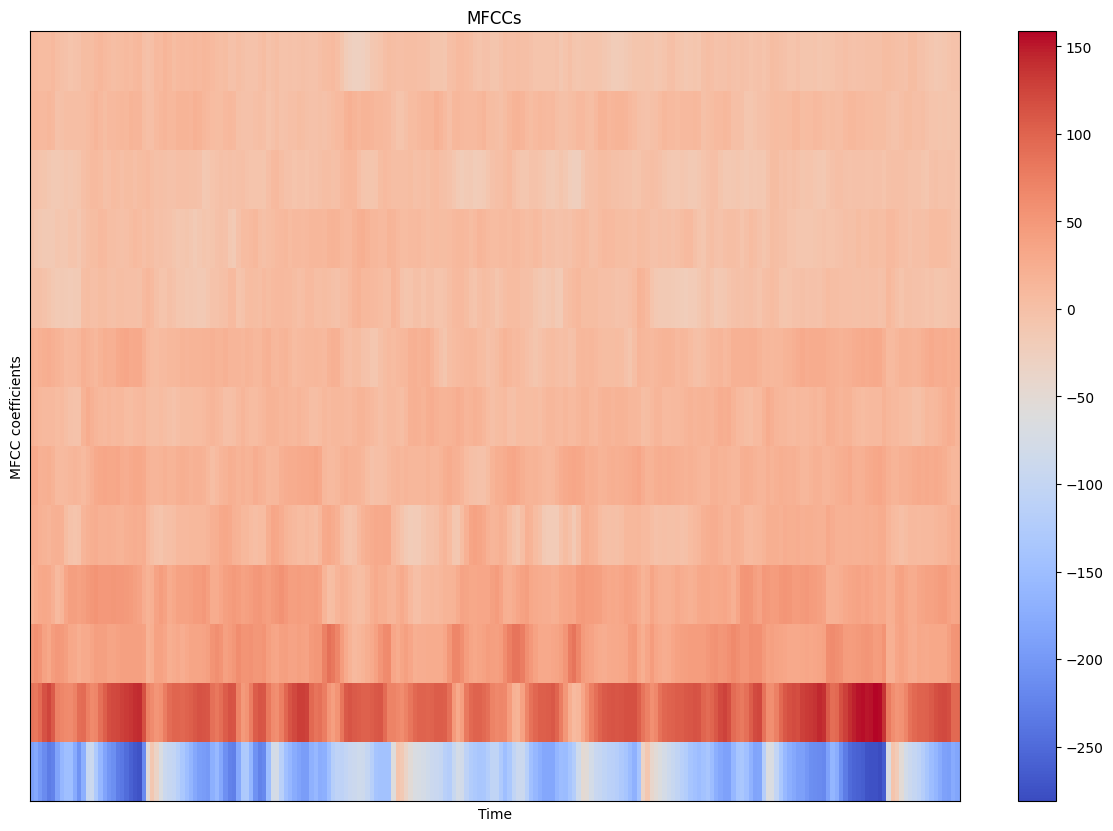

In [97]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import librosa.display

FIG_SIZE = (15,10)
file= "MUSIC/cut/00/00.00000.wav"
# Load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

# Define figure size
FIG_SIZE = (15, 10)

# WAVEFORM
# Display waveform
plt.figure(figsize=FIG_SIZE)
plt.plot(signal, alpha=0.4)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Waveform")

# FFT -> Power spectrum
# Perform Fourier transform
fft = np.fft.fft(signal)

# Calculate absolute values on complex numbers to get magnitude
spectrum = np.abs(fft)

# Create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# Plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# STFT -> Spectrogram
hop_length = 512  # in num. of samples
n_fft = 2048  # window in num. of samples

# Calculate duration hop length and window in seconds
hop_length_duration = float(hop_length) / sample_rate
n_fft_duration = float(n_fft) / sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# Calculate absolute values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# Display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

# Apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

# MFCCs
# Extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# Display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# Show plots
plt.show()


### Create feature of the song

In [103]:
import os
import librosa
import pandas as pd

def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    
    # Extract features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    harmony = librosa.effects.harmonic(y=y)
    
    # Calculate statistics for each feature
    features = [np.mean(chroma_stft), np.var(chroma_stft),
                np.mean(rms), np.var(rms),
                np.mean(spectral_centroid), np.var(spectral_centroid),
                np.mean(spectral_bandwidth), np.var(spectral_bandwidth),
                np.mean(rolloff), np.var(rolloff),
                np.mean(zero_crossing_rate), np.var(zero_crossing_rate),
                np.mean(harmony), np.var(harmony),
                tempo]
    for i in range(20):
        features += [np.mean(mfcc[i]), np.var(mfcc[i])]
    
    return features


In [115]:
import os
import pandas as pd

# Set the target folder path
directory = 'MUSIC/cut/80'
data = []

# Extract features and save them to a list
for filename in os.listdir(directory):
    if filename.endswith(".wav"):
        file_path = os.path.join(directory, filename)
        features = extract_features(file_path)
        data.append([filename, 40000] + features)

# Column names
columns = ['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
           'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
           'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
           'harmony_mean', 'harmony_var', 'tempo']
for i in range(1, 21):
    columns += [f'mfcc{i}_mean', f'mfcc{i}_var']

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Load the existing CSV file
existing_df = pd.read_csv('chinesessong_features.csv')

# Append the newly extracted features to the existing DataFrame
updated_df = pd.concat([existing_df, df], ignore_index=True)

# Save the updated DataFrame to a CSV file
updated_df.to_csv('chinesessong_features.csv', index=False)


### change the channel of the song

In [120]:
import os
import torch  # 添加这行
import torchaudio
from torchaudio.transforms import Resample

def downmix_mono(waveform):
    """Convert a multi-channel waveform to mono by averaging across channels."""
    return torch.mean(waveform, dim=0, keepdim=True)


In [124]:
source_folder = 'MUSIC/cut/80'  # Replace with the path to your source folder
target_folder = 'MUSIC/cut2/80'  # Replace with the path to the target folder where you want to save the processed files
new_sample_rate = 8000  # Define the target sample rate

# Ensure the target folder exists
os.makedirs(target_folder, exist_ok=True)

for file_name in os.listdir(source_folder):
    if file_name.endswith('.wav'):  # Process only WAV files
        file_path = os.path.join(source_folder, file_name)
        waveform, sample_rate = torchaudio.load(file_path)
        
        # Convert to mono if stereo
        if waveform.shape[0] > 1:
            waveform = downmix_mono(waveform)
        
        # Resample if sample rate doesn't match
        if sample_rate != new_sample_rate:
            resampler = Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
            waveform = resampler(waveform)
        
        # Save the processed waveform
        target_path = os.path.join(target_folder, file_name)
        torchaudio.save(target_path, waveform, new_sample_rate)
        print(f'Processed {file_name}')


Processed 80.00488.wav
Processed 80.00098.wav
Processed 80.00264.wav
Processed 80.00270.wav
Processed 80.00258.wav
Processed 80.00066.wav
Processed 80.00072.wav
Processed 80.00112.wav
Processed 80.00106.wav
Processed 80.00310.wav
Processed 80.00476.wav
Processed 80.00462.wav
Processed 80.00304.wav
Processed 80.00338.wav
Processed 80.00448.wav
Processed 80.00474.wav
Processed 80.00312.wav
Processed 80.00306.wav
Processed 80.00460.wav
Processed 80.00138.wav
Processed 80.00110.wav
Processed 80.00104.wav
Processed 80.00058.wav
Processed 80.00064.wav
Processed 80.00070.wav
Processed 80.00266.wav
Processed 80.00272.wav
Processed 80.00298.wav
Processed 80.00288.wav
Processed 80.00276.wav
Processed 80.00262.wav
Processed 80.00048.wav
Processed 80.00074.wav
Processed 80.00060.wav
Processed 80.00128.wav
Processed 80.00100.wav
Processed 80.00114.wav
Processed 80.00458.wav
Processed 80.00464.wav
Processed 80.00302.wav
Processed 80.00316.wav
Processed 80.00470.wav
Processed 80.00300.wav
Processed 8